In [4]:
!pip install pandas==1.1.5 --force-reinstall

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pandas==1.1.5 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0,

In [3]:
import sys
print(sys.executable)

/home/dpnm/.pyenv/versions/3.8.3/bin/python


In [5]:
!/home/dpnm/.pyenv/versions/3.8.3/bin/python -m pip install pandas==1.3.5 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 19.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 18.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2020.1
    Uninstalling pytz-2020.1:
      Successfully uninstalled pytz-2020.1
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.9.0.post0
    Uni

In [1]:
import os 
import pandas as pd
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

# This three librarios are from local
from log_parser_lib import *
from AB_score_lib import *
from LogNetconfAD_lib import *

import datetime

/home/dpnm/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Read and Parsing Netconf data 

In [2]:
netconf_file_path='../2401_log_netconf/ncclient/juniper'

In [3]:
file_list=os.listdir(netconf_file_path)
file_list.sort()
file_list

['.gitkeep',
 '2024-01-08T16-59-50.json',
 '2024-01-08T17-05-01.json',
 '2024-01-08T17-10-16.json',
 '2024-01-08T17-15-29.json',
 '2024-01-08T17-20-42.json',
 '2024-01-08T17-25-56.json',
 '2024-01-08T17-31-10.json',
 '2024-01-08T17-36-23.json',
 '2024-01-08T17-41-38.json',
 '2024-01-08T17-46-51.json',
 '2024-01-08T17-52-06.json',
 '2024-01-08T17-57-19.json',
 '2024-01-08T18-02-33.json',
 '2024-01-08T18-07-47.json',
 '2024-01-08T18-13-01.json',
 '2024-01-08T18-18-15.json',
 '2024-01-08T18-23-29.json',
 '2024-01-08T18-28-42.json',
 '2024-01-08T18-33-56.json',
 '2024-01-08T18-39-10.json',
 '2024-01-08T18-44-24.json',
 '2024-01-08T18-49-38.json',
 '2024-01-08T18-54-52.json',
 '2024-01-08T19-00-07.json',
 '2024-01-08T19-05-21.json',
 '2024-01-08T19-10-35.json',
 '2024-01-08T19-15-49.json',
 '2024-01-08T19-21-04.json',
 '2024-01-08T19-26-17.json',
 '2024-01-08T19-31-32.json',
 '2024-01-08T19-36-46.json',
 '2024-01-08T19-42-00.json',
 '2024-01-08T19-47-14.json',
 '2024-01-08T19-52-27.json',
 

In [4]:
def json_date_parsing(file_name):
    date_=datetime.datetime.strptime(file_name, '%Y-%m-%dT%H-%M-%S.json')
    return date_

In [5]:
json_date_parsing(file_list[1])

datetime.datetime(2024, 1, 8, 16, 59, 50)

In [6]:
def json_read_content(file_name):
    with open(file_name) as f:
        json_data=json.load(f)
    del json_data['time'], json_data['down-interfaces'], json_data['up-interfaces'], json_data['interface-information']
    stat=json_data['statistics']
    del json_data['statistics']
    for protocol in stat.keys():
        for key, value in stat[protocol].items():
            if type(value)==int and value!=0:
                json_data[protocol+'-'+key]=value
    #print(json_data.keys())
    json_data['cpu-util']=int(json_data['cpu-util'][:-1])
    json_data['mem-util']=int(json_data['mem-util'][:-1])
    json_data['chassi-temperature']=int(json_data['chassi-temperature'][:-1])
    return json_data

In [7]:
data=pd.DataFrame()
for single_file in file_list:
    if not single_file.endswith('.json'):
        continue
    file_date=json_date_parsing(single_file)
    file_content=json_read_content(netconf_file_path+'/'+single_file)
    data=data.append(pd.Series(file_content, name=file_date))

In [8]:
data

,cpu-util,mem-util,chassi-temperature,arp-arp-replies-sent,arp-arp-requests-received,arp-datagrams-received,icmp-calls-to-icmp-error,ip-incoming-ttpoip-packets-received,ip-outgoing-ttpoip-packets-sent,ip-output-packets-discarded-due-to-no-route,...,tcp-packets-received-after-close,tcp-connections-updated-rtt-on-close,tcp-connections-updated-variance-on-close,tcp-byte-retransmits,tcp-retransmit-timeouts,tcp-retransmitted-bytes,tcp-sack-options-received,tcp-sack-recovery-episodes,tcp-segment-retransmits,tcp-sent-data-packets-retransmitted
2024-01-08 16:59:50,23.0,16.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-08 17:05:01,22.0,16.0,40.0,10.0,10.0,10.0,139.0,3128.0,4310.0,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-08 17:10:16,20.0,16.0,40.0,12.0,12.0,12.0,142.0,2455.0,4131.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-08 17:15:29,20.0,16.0,40.0,12.0,12.0,12.0,137.0,2442.0,4453.0,193.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-08 17:20:42,21.0,16.0,40.0,11.0,11.0,11.0,138.0,2829.0,4494.0,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24 20:42:24,21.0,18.0,40.0,13.0,13.0,14.0,136.0,3384.0,5225.0,3.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-24 20:47:37,17.0,18.0,40.0,13.0,13.0,13.0,142.0,5303.0,7493.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-24 20:52:52,21.0,18.0,40.0,9.0,9.0,9.0,138.0,3619.0,4816.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-24 20:58:06,21.0,18.0,40.0,11.0,11.0,11.0,135.0,2098.0,2794.0,NaN,...,NaN,1.0,1.0,9936.0,4.0,4344.0,424.0,6.0,20.0,3.0


In [10]:
# 항상 0인 column이 정상적으로 제거됐는지 확인
column_means=data.mean()
column_means[column_means==0].index

Index([], dtype='object')

In [24]:
split_timestamp=datetime.datetime(2024,1,16,12,0)
condition=data.index>=split_timestamp
data_no=data.loc[condition]
data_no.mean()

cpu-util                                 20.354573
mem-util                                 16.045080
chassi-temperature                       41.108799
arp-arp-replies-sent                      9.144343
arp-arp-requests-received                 9.144343
                                          ...     
tcp-retransmitted-bytes                4344.000000
tcp-sack-options-received               424.000000
tcp-sack-recovery-episodes                6.000000
tcp-segment-retransmits                  20.000000
tcp-sent-data-packets-retransmitted       3.000000
Length: 62, dtype: float64

In [12]:
condition=data.index<split_timestamp
data_ab=data.loc[condition]
data_ab.mean()

cpu-util                               20.494639
mem-util                               16.000000
chassi-temperature                     41.231702
arp-arp-replies-sent                    9.146922
arp-arp-requests-received               9.146922
                                         ...    
tcp-retransmitted-bytes                      NaN
tcp-sack-options-received                    NaN
tcp-sack-recovery-episodes                   NaN
tcp-segment-retransmits                      NaN
tcp-sent-data-packets-retransmitted          NaN
Length: 62, dtype: float64

In [31]:
data.shape

(4452, 62)

# Test RNN only with Netconf data

In [33]:
AD(data,freq='4H',lr=0.01, use_simple=False)

Epoch [1/1000], Loss: 0.7507
Predciction accuracy is 0.55
F1 score is 0.68
16 corrects among 29 data
Epoch [51/1000], Loss: 0.6848
Predciction accuracy is 0.48
F1 score is 0.00
14 corrects among 29 data
Epoch [101/1000], Loss: 0.6770
Predciction accuracy is 0.48
F1 score is 0.00
14 corrects among 29 data
Epoch [151/1000], Loss: 0.7300
Predciction accuracy is 0.48
F1 score is 0.00
14 corrects among 29 data
Epoch [201/1000], Loss: 0.6267
Predciction accuracy is 0.48
F1 score is 0.00
14 corrects among 29 data
Epoch [251/1000], Loss: 0.6467
Predciction accuracy is 0.48
F1 score is 0.00
14 corrects among 29 data
Epoch [301/1000], Loss: 0.6936
Predciction accuracy is 0.48
F1 score is 0.00
14 corrects among 29 data
Epoch [351/1000], Loss: 0.6547
Predciction accuracy is 0.48
F1 score is 0.00
14 corrects among 29 data
Epoch [401/1000], Loss: 0.7007
Predciction accuracy is 0.48
F1 score is 0.00
14 corrects among 29 data
Epoch [451/1000], Loss: 0.6191
Predciction accuracy is 0.48
F1 score is 0.00

KeyboardInterrupt: 

# Let's calculate IF-IDF now

In [15]:
with open('data.pkl','rb') as f:
    data_=pkl.load(f)
(log_dict, synant_dict, log_patterns,event_list),(Q, sigma, delta, initialState, F_) = data_
with open('tf_data.pkl', 'rb')as f:
    data_=pkl.load(f)
tf_idf, num_all_docs = data_
print(f'event num is {len(event_list)}')

event num is 50


In [16]:
len(tf_idf), len(log_patterns)

(177, 177)

In [17]:
log_path='../2401_log_netconf/log'
log_data=pd.DataFrame()
norm_num=0
date_list=os.listdir(log_path)
                     
for date in date_list:
    if os.path.isfile(log_path+'/'+date) or date.startswith('06'):
        continue
    dir_list=os.listdir(log_path+'/'+date)
    single_log_data=[]
    mon=int(date[:2])
    day=int(date[3:])
    for dir_name in dir_list:
        file_list=os.listdir(log_path+'/'+date+'/'+dir_name)
        for file_name in file_list:
            #print(log_path+'/'+date+'/'+dir_name+'/'+file_name)
            log_=read_file(log_path+'/'+date+'/'+dir_name+'/'+file_name)
        if log_:
            single_log_data.extend(log_)
    df=pd.DataFrame(single_log_data)
    df['date']=df['date'].apply(lambda x: x.replace(year=2024, month=mon, day=day))
    df.set_index('date', inplace=True)
    log_data=pd.concat([log_data, df])
log_data=log_data.sort_index()

In [18]:
tf_idf_results=calculate_abnormal_score_for_df(log_data,log_dict, log_patterns, event_list, tf_idf, num_all_docs)

50
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log event
unseen log pattern
unseen log event
unseen log pattern
unseen log event
unseen log pattern
unseen log pattern
unseen log event
unseen log pattern
unseen log event
unseen log pattern
unseen log event
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log pattern
unseen log event
unseen log pattern
unseen log event


In [19]:
tf_idf_results

,tf_idf,occurence_probability,repeat_rate
2024-01-08 04:46:23,4.451370,1,0.693147
2024-01-08 04:46:24,4.137384,1.0,1.098612
2024-01-08 05:12:17,2.767188,1.0,1.098612
2024-01-08 05:15:49,4.137384,0.000068,1.609438
2024-01-08 05:19:26,2.767188,0.000041,1.945910
...,...,...,...
2024-01-31 13:28:24,5.153684,0.044258,0.693147
2024-01-31 13:43:24,5.153684,0.044258,0.693147
2024-01-31 13:58:23,5.153684,0.044258,0.693147
2024-01-31 14:13:24,5.153684,0.044258,0.693147


## Merge TF-IDF with NetConf

In [20]:
def calculate_average_values(row_B, df_A, column_name, window_minutes):
    window_start = row_B.name - pd.Timedelta(minutes=window_minutes)
    window_end = row_B.name + pd.Timedelta(minutes=window_minutes)
    filtered_values = df_A[column_name].loc[(df_A.index >= window_start) & (df_A.index <= window_end)]
    if not filtered_values.empty:
        return filtered_values.mean()
    else:
        return None

In [21]:
window_minutes = 10
for column_name, column in data.items():
    tf_idf_results['average_'+column_name]=tf_idf_results.apply(lambda row: calculate_average_values(row, data, column_name, window_minutes), axis=1)

In [ ]:
#merged_df=pd.merge_asof(data, tf_idf_results, left_index=True, right_index=True, tolerance=pd.Timedelta('5 minute'))

In [30]:
tf_idf_results.shape

(1713, 65)

In [25]:
condition=tf_idf_results.index<split_timestamp
tf_ab=tf_idf_results.loc[condition]
tf_ab.mean()

tf_idf                                          5.592639
occurence_probability                           0.138163
repeat_rate                                     1.787177
average_cpu-util                               20.406922
average_mem-util                               16.000000
                                                 ...    
average_tcp-retransmitted-bytes                      NaN
average_tcp-sack-options-received                    NaN
average_tcp-sack-recovery-episodes                   NaN
average_tcp-segment-retransmits                      NaN
average_tcp-sent-data-packets-retransmitted          NaN
Length: 65, dtype: float64

In [26]:
condition=tf_idf_results.index>=split_timestamp
tf_no=tf_idf_results.loc[condition]
tf_no.mean()

tf_idf                                            5.141488
occurence_probability                             0.046939
repeat_rate                                       0.715789
average_cpu-util                                 20.338779
average_mem-util                                 16.078915
                                                  ...     
average_tcp-retransmitted-bytes                4344.000000
average_tcp-sack-options-received               424.000000
average_tcp-sack-recovery-episodes                6.000000
average_tcp-segment-retransmits                  20.000000
average_tcp-sent-data-packets-retransmitted       3.000000
Length: 65, dtype: float64

In [27]:
tf_idf_results.mean()

tf_idf                                            5.209174
occurence_probability                             0.060626
repeat_rate                                       0.876528
average_cpu-util                                 20.354737
average_mem-util                                 16.060434
                                                  ...     
average_tcp-retransmitted-bytes                4344.000000
average_tcp-sack-options-received               424.000000
average_tcp-sack-recovery-episodes                6.000000
average_tcp-segment-retransmits                  20.000000
average_tcp-sent-data-packets-retransmitted       3.000000
Length: 65, dtype: float64

## Test total data

Epoch [1/1000], Loss: 0.7005
Predciction accuracy is 0.46
F1 score is 0.00
16 corrects among 35 data
Epoch [51/1000], Loss: 0.5325
Predciction accuracy is 0.51
F1 score is 0.19
18 corrects among 35 data
Epoch [101/1000], Loss: 0.4778
Predciction accuracy is 0.69
F1 score is 0.67
24 corrects among 35 data
Epoch [151/1000], Loss: 0.4458
Predciction accuracy is 0.77
F1 score is 0.78
27 corrects among 35 data
Epoch [201/1000], Loss: 0.5827
Predciction accuracy is 0.77
F1 score is 0.78
27 corrects among 35 data
Epoch [251/1000], Loss: 0.4495
Predciction accuracy is 0.77
F1 score is 0.78
27 corrects among 35 data
Epoch [301/1000], Loss: 0.4374
Predciction accuracy is 0.77
F1 score is 0.78
27 corrects among 35 data
Epoch [351/1000], Loss: 0.4748
Predciction accuracy is 0.77
F1 score is 0.78
27 corrects among 35 data
Epoch [401/1000], Loss: 0.5614
Predciction accuracy is 0.77
F1 score is 0.78
27 corrects among 35 data
Epoch [451/1000], Loss: 0.5871
Predciction accuracy is 0.71
F1 score is 0.71

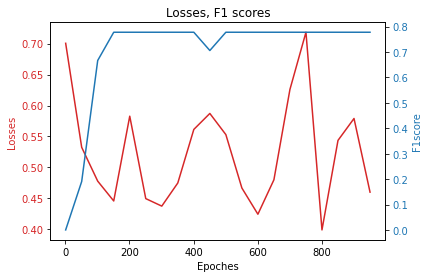

In [44]:
AD(tf_idf_results,freq='4H',lr=0.01)

Epoch [1/1000], Loss: 1.8183
Predciction accuracy is 0.86
F1 score is 0.86
30 corrects among 35 data
Epoch [51/1000], Loss: 0.3892
Predciction accuracy is 0.63
F1 score is 0.48
22 corrects among 35 data
Epoch [101/1000], Loss: 0.6311
Predciction accuracy is 0.66
F1 score is 0.54
23 corrects among 35 data
Epoch [151/1000], Loss: 0.5678
Predciction accuracy is 0.66
F1 score is 0.54
23 corrects among 35 data
Epoch [201/1000], Loss: 0.6885
Predciction accuracy is 0.66
F1 score is 0.54
23 corrects among 35 data
Epoch [251/1000], Loss: 0.4514
Predciction accuracy is 0.66
F1 score is 0.54
23 corrects among 35 data
Epoch [301/1000], Loss: 0.3157
Predciction accuracy is 0.66
F1 score is 0.54
23 corrects among 35 data
Epoch [351/1000], Loss: 0.2841
Predciction accuracy is 0.66
F1 score is 0.54
23 corrects among 35 data
Epoch [401/1000], Loss: 0.4113
Predciction accuracy is 0.60
F1 score is 0.36
21 corrects among 35 data
Epoch [451/1000], Loss: 0.3105
Predciction accuracy is 0.66
F1 score is 0.54

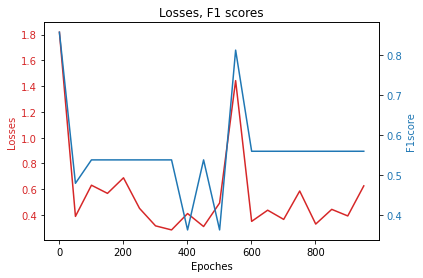

In [35]:
AD(tf_idf_results,freq='4H',lr=0.01, use_simple=False)